# Congress Age vs Party Agreeability

### Gabriel Small, Evgenia Anastasakos, Jeffrey Liu

In [130]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Importing Data
* Importing data from the 538 datasets for
  > * Congress Age
  > * Congressional Agreement with Trump
  > * Congressional Agreement with Biden
  

## Cleaning Data
* Group By Bioguide
* Add Columns for Trump agreements vs Total
* Add Columns for Biden agreements vs Total
* Remove duplicates, grouping by earliest year joined, and latest age and cmltv congress
* Add Column for ratio of Biden Agreement to Biden Agreement Total and same with Trump

In [131]:
congress_df = pd.read_csv("data_aging_congress.csv")
congress_df = congress_df.rename(columns = {'bioguide_id': 'bioguide'})

trump_agreement = pd.read_csv("vote_predictions.csv")
biden_agreement = pd.read_csv("votes-Table 1.csv")
#count biden agreement by bioguide
#make a dataframe with the count of biden position equaling vote by bioguide#
biden_agreement = biden_agreement.value_counts(['bioguide','biden_position','vote']).sort_index().reset_index(name='biden_count_total')
biden_agreement['biden_agree_counts'] = biden_agreement['biden_count_total'] * (biden_agreement['biden_position'] == biden_agreement['vote'])
#now group by bioguide 
biden_agreement = biden_agreement.groupby('bioguide').agg({'biden_count_total':'sum','biden_agree_counts':'sum'}).reset_index()
# do the same for trump, first changing no and yes to support or oppose
trump_agreement['vote'] = trump_agreement['vote'].replace({'No':'oppose','Yes':'support'})
trump_agreement = trump_agreement.value_counts(['bioguide','trump_position','vote']).sort_index().reset_index(name='trump_count_total')
trump_agreement['trump_agree_counts'] = trump_agreement['trump_count_total'] * (trump_agreement['trump_position'] == trump_agreement['vote'])
trump_agreement = trump_agreement.groupby('bioguide').agg({'trump_count_total':'sum','trump_agree_counts':'sum'}).reset_index()
#combine all of the datasets
congress_df = congress_df.merge(trump_agreement, on='bioguide', how='inner')
congress_df = congress_df.merge(biden_agreement, on='bioguide', how='inner')
congress_df_clean = congress_df.groupby('bioguide').max().reset_index()
congress_df_clean['start_date'] = congress_df.groupby('bioguide').min().reset_index()['start_date']
congress_df_clean['biden_agree_count_ratio'] = congress_df_clean['biden_agree_counts'] / congress_df_clean['biden_count_total']
congress_df_clean['trump_agree_count_ratio'] = congress_df_clean['trump_agree_counts'] / congress_df_clean['trump_count_total']
#for the sake of this, independents are democrats
congress_df_clean['party_code'] = congress_df_clean['party_code'].replace({328: 100})
congress_df_clean   

,bioguide,congress,start_date,chamber,state_abbrev,party_code,bioname,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,trump_count_total,trump_agree_counts,biden_count_total,biden_agree_counts,biden_agree_count_ratio,trump_agree_count_ratio
0,A000055,118,1997-01-03,House,AL,200,"ADERHOLT, Robert",1965-07-22,14,14,20984,57.451061,Gen X,188,177,52,3,0.057692,0.941489
1,A000148,118,2021-01-03,House,MA,100,"AUCHINCLOSS, Jake",1988-01-29,2,2,12758,34.929500,Millennial,3,0,51,49,0.960784,0.000000
2,A000369,118,2011-01-03,House,NV,200,"AMODEI, Mark E.",1958-06-12,7,7,23581,64.561259,Boomers,188,172,54,3,0.055556,0.914894
3,A000370,118,2013-01-03,House,NC,100,"ADAMS, Alma",1946-05-27,6,6,27980,76.605065,Boomers,188,21,54,52,0.962963,0.111702
4,A000371,118,2015-01-03,House,CA,100,"AGUILAR, Peter Rey",1979-06-19,5,5,15904,43.542779,Gen X,188,32,54,52,0.962963,0.170213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,W000823,118,2019-01-03,House,FL,200,"WALTZ, Michael",1974-01-31,3,3,17869,48.922656,Gen X,92,77,52,2,0.038462,0.836957
434,W000825,118,2019-01-03,House,VA,100,"WEXTON, Jennifer",1968-05-27,3,3,19944,54.603696,Gen X,92,6,49,49,1.000000,0.065217
435,W000826,118,2017-01-03,House,PA,100,"WILD, Susan",1957-06-07,4,4,23951,65.574264,Boomers,95,9,53,49,0.924528,0.094737
436,Y000064,118,2011-01-03,Senate,IN,200,"YOUNG, Todd",1972-08-24,7,4,18394,50.360027,Gen X,129,106,144,41,0.284722,0.821705


# Analysis of Data
* Summary of Data
* Correlation Matrix
* Graph Relation of Age to Agreement with Trump
* Graph Relation of Age to Agreement with Biden
* Graph Relation of Agreement with Trump to Agreement with Biden
* Graph Relation of Party with Agreement
* Graph Cumulitive Congresses
* 

In [132]:
congress_df_clean.describe()
congress_df_clean.corr(numeric_only=True)
#based on this, i can see that cmltv_chamber and age have low correlations so i can use them both as  features
#i can also see that party code shares an expected correlation with president agreement



,congress,party_code,cmltv_cong,cmltv_chamber,age_days,age_years,trump_count_total,trump_agree_counts,biden_count_total,biden_agree_counts,biden_agree_count_ratio,trump_agree_count_ratio
congress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party_code,NaN,1.000000,-0.208785,-0.206064,-0.101777,-0.101777,-0.177476,0.677929,-0.018238,-0.732673,-0.984690,0.940814
cmltv_cong,NaN,-0.208785,1.000000,0.958774,0.595022,0.595022,0.484854,0.118687,0.254647,0.327092,0.251159,-0.144905
cmltv_chamber,NaN,-0.206064,0.958774,1.000000,0.595086,0.595086,0.539681,0.138341,0.108429,0.229253,0.238126,-0.149427
age_days,NaN,-0.101777,0.595022,0.595086,1.000000,1.000000,0.327551,0.089185,0.188560,0.193026,0.133999,-0.046424
age_years,NaN,-0.101777,0.595022,0.595086,1.000000,1.000000,0.327551,0.089185,0.188560,0.193026,0.133999,-0.046424
trump_count_total,NaN,-0.177476,0.484854,0.539681,0.327551,0.327551,1.000000,0.493392,-0.110824,0.060942,0.181027,-0.076505
trump_agree_counts,NaN,0.677929,0.118687,0.138341,0.089185,0.089185,0.493392,1.000000,-0.015324,-0.472027,-0.669976,0.728733
biden_count_total,NaN,-0.018238,0.254647,0.108429,0.188560,0.188560,-0.110824,-0.015324,1.000000,0.592963,0.102890,0.033228
biden_agree_counts,NaN,-0.732673,0.327092,0.229253,0.193026,0.193026,0.060942,-0.472027,0.592963,1.000000,0.778838,-0.637471


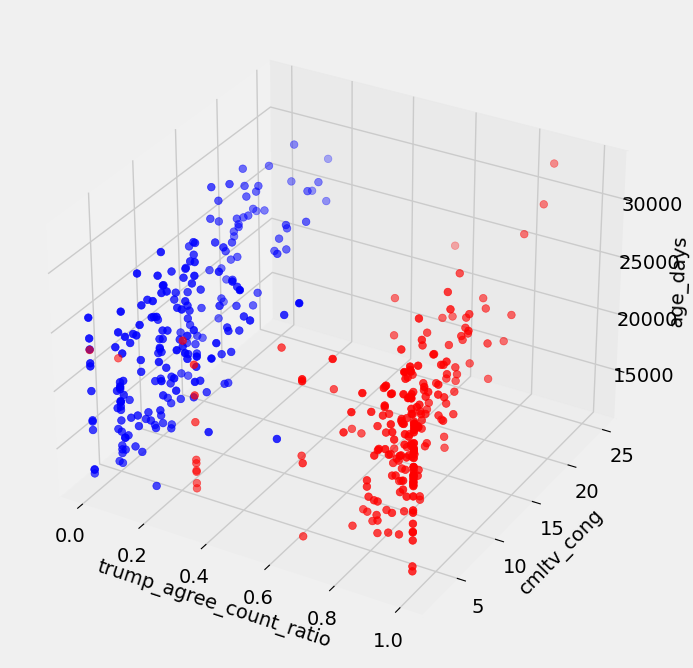

In [133]:
fig = plots.figure(figsize = (12,8))
ax = plots.axes(projection='3d')


ax.scatter3D(congress_df_clean.loc[congress_df_clean['party_code']== 200]['trump_agree_count_ratio'], congress_df_clean.loc[congress_df_clean['party_code']== 200]['cmltv_cong'], congress_df_clean.loc[congress_df_clean['party_code']== 200]['age_days'] , color='red', s=30)
ax.scatter3D(congress_df_clean.loc[congress_df_clean['party_code']== 100]['trump_agree_count_ratio'], congress_df_clean.loc[congress_df_clean['party_code']== 100]['cmltv_cong'], congress_df_clean.loc[congress_df_clean['party_code']== 100]['age_days'] , color='blue', s=30)


ax.set_xlabel('trump_agree_count_ratio')
ax.set_ylabel('cmltv_cong')
ax.set_zlabel('age_days');

#This shows that a classification by agree count would ber fairly easy to do. 

In [134]:
#add party disloyalty column, where for republicans, party disloyalty is trump_agreee_count_ratio - biden_agree_count_ratio and for democrats, party disloyalty is biden_agree_count_ratio - trump_agree_count_ratio
congress_df_clean['party_disloyalty'] = np.where(congress_df_clean['party_code'] == 100, congress_df_clean['trump_agree_count_ratio'], congress_df_clean['biden_agree_count_ratio'])
congress_df_clean = congress_df_clean[congress_df_clean['party_disloyalty'] != 0]
congress_df_clean

,bioguide,congress,start_date,chamber,state_abbrev,party_code,bioname,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,trump_count_total,trump_agree_counts,biden_count_total,biden_agree_counts,biden_agree_count_ratio,trump_agree_count_ratio,party_disloyalty
0,A000055,118,1997-01-03,House,AL,200,"ADERHOLT, Robert",1965-07-22,14,14,20984,57.451061,Gen X,188,177,52,3,0.057692,0.941489,0.057692
2,A000369,118,2011-01-03,House,NV,200,"AMODEI, Mark E.",1958-06-12,7,7,23581,64.561259,Boomers,188,172,54,3,0.055556,0.914894,0.055556
3,A000370,118,2013-01-03,House,NC,100,"ADAMS, Alma",1946-05-27,6,6,27980,76.605065,Boomers,188,21,54,52,0.962963,0.111702,0.111702
4,A000371,118,2015-01-03,House,CA,100,"AGUILAR, Peter Rey",1979-06-19,5,5,15904,43.542779,Gen X,188,32,54,52,0.962963,0.170213,0.170213
5,A000372,118,2015-01-03,House,GA,200,"ALLEN, Rick W.",1951-11-07,5,5,25990,71.156742,Boomers,188,180,54,3,0.055556,0.957447,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,W000823,118,2019-01-03,House,FL,200,"WALTZ, Michael",1974-01-31,3,3,17869,48.922656,Gen X,92,77,52,2,0.038462,0.836957,0.038462
434,W000825,118,2019-01-03,House,VA,100,"WEXTON, Jennifer",1968-05-27,3,3,19944,54.603696,Gen X,92,6,49,49,1.000000,0.065217,0.065217
435,W000826,118,2017-01-03,House,PA,100,"WILD, Susan",1957-06-07,4,4,23951,65.574264,Boomers,95,9,53,49,0.924528,0.094737,0.094737
436,Y000064,118,2011-01-03,Senate,IN,200,"YOUNG, Todd",1972-08-24,7,4,18394,50.360027,Gen X,129,106,144,41,0.284722,0.821705,0.284722


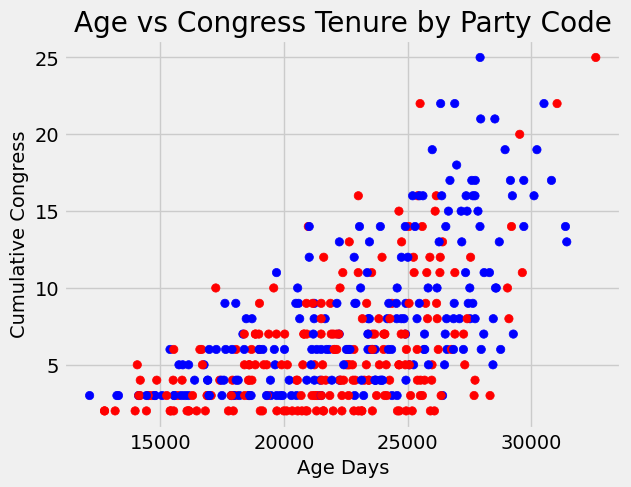

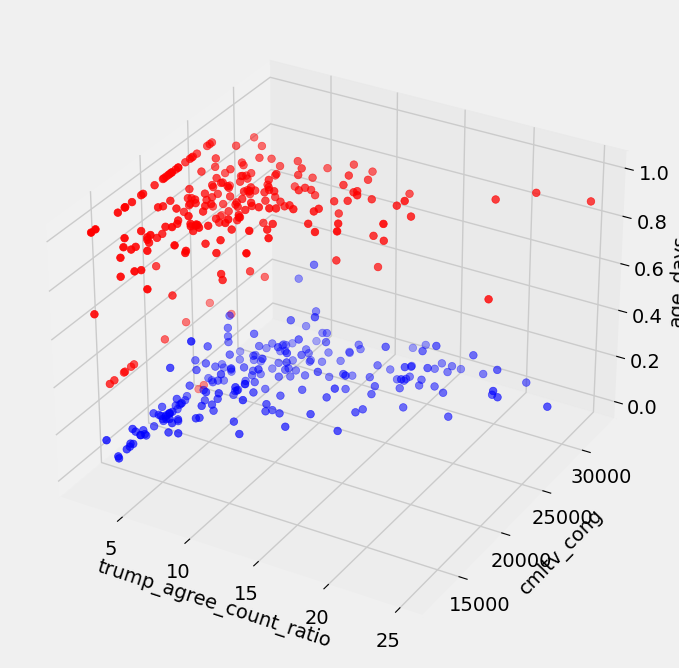

In [135]:
# code here and in additional cells if needed

plots.scatter( congress_df_clean['age_days'],congress_df_clean['cmltv_cong'], c=congress_df_clean['party_code'], cmap='bwr')
#use red and blue colors to represent party code
plots.ylabel('Cumulative Congress')
plots.xlabel('Age Days')
plots.title('Age vs Congress Tenure by Party Code')
plots.show()
# No party seems to have a clear advantage in terms of age and cmltv_cong

#see biden and trump decision based on age and tenure
fig = plots.figure(figsize = (12,8))
ax = plots.axes(projection='3d')


ax.scatter3D( congress_df_clean['cmltv_cong'], congress_df_clean['age_days'] ,congress_df_clean['trump_agree_count_ratio'],c=congress_df_clean['party_code'], cmap='bwr', s=30)



ax.set_xlabel('trump_agree_count_ratio')
ax.set_ylabel('cmltv_cong')
ax.set_zlabel('age_days');




#This shows that a classification by agree count would ber fairly easy to do. 

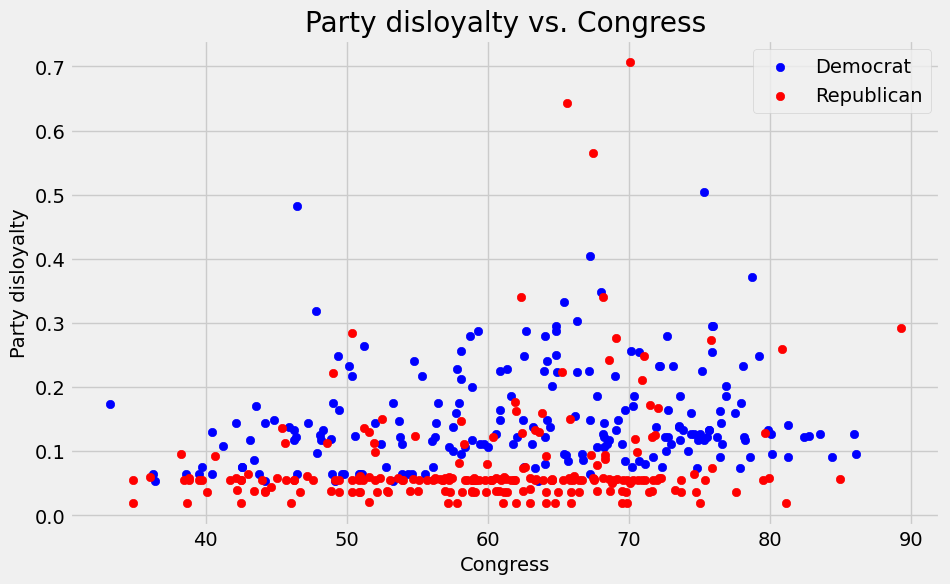

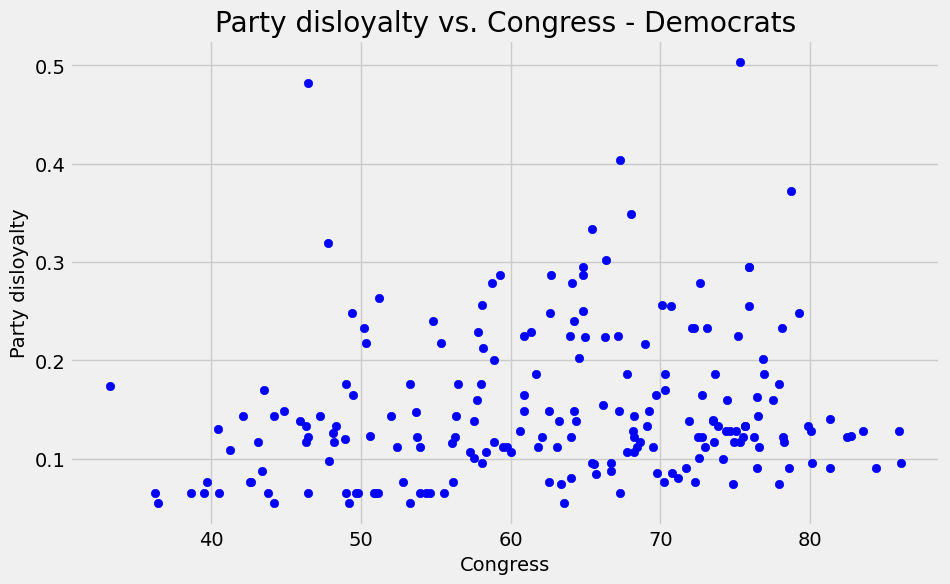

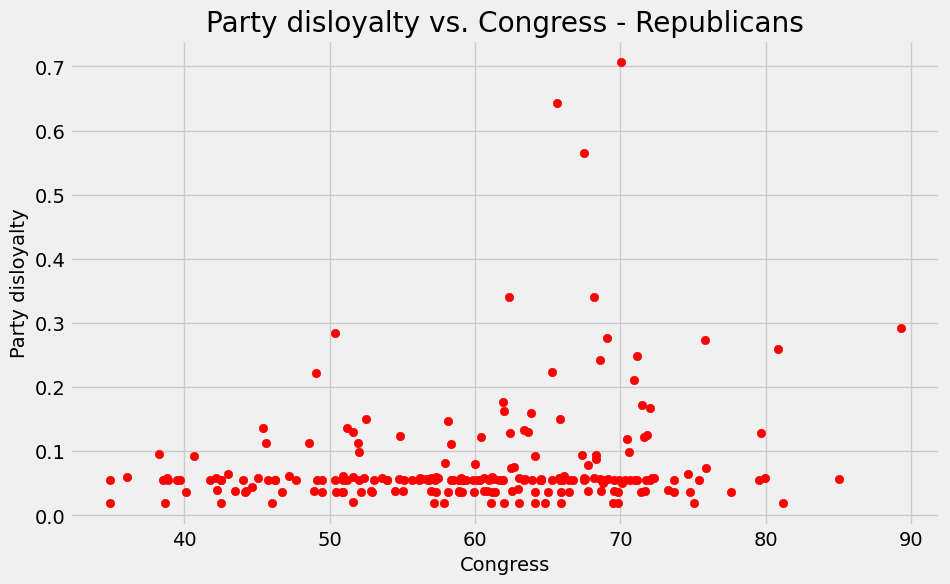

In [136]:


democrat_data = congress_df_clean[congress_df_clean['party_code'] == 100]
republican_data = congress_df_clean[congress_df_clean['party_code'] == 200]

# Plot scatterplot
plots.figure(figsize=(10, 6))
plots.scatter(democrat_data['age_years'], democrat_data['party_disloyalty'], color='blue', label='Democrat')
plots.scatter(republican_data['age_years'], republican_data['party_disloyalty'], color='red', label='Republican')

# Set labels and title
plots.xlabel('Congress')
plots.ylabel('Party disloyalty')
plots.title('Party disloyalty vs. Congress')
plots.legend()

# Show plot
plots.grid(True)
plots.show()

plots.figure(figsize=(10, 6))
plots.scatter((democrat_data['age_years']), (democrat_data['party_disloyalty']), color='blue')
plots.xlabel('Congress')
plots.ylabel('Party disloyalty')
plots.title('Party disloyalty vs. Congress - Democrats')
plots.grid(True)
plots.show()

# Plot scatterplot for Republicans
plots.figure(figsize=(10, 6))
plots.scatter(republican_data['age_years'], republican_data['party_disloyalty'], color='red')
plots.xlabel('Congress')
plots.ylabel('Party disloyalty')
plots.title('Party disloyalty vs. Congress - Republicans')
plots.grid(True)
plots.show()

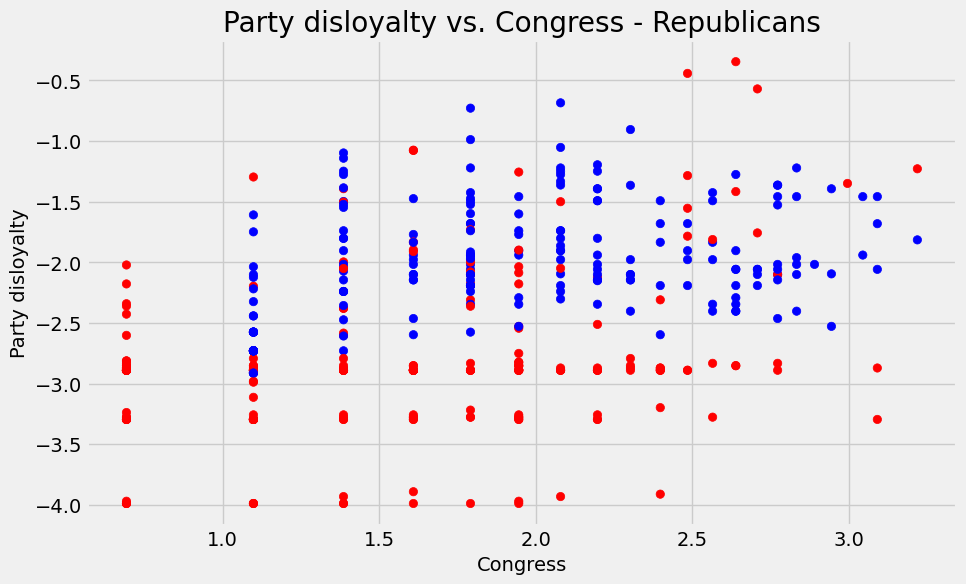

In [137]:
# Plot scatterplot for politicians with a log transform
plots.figure(figsize=(10, 6))
plots.scatter(np.log(congress_df_clean['cmltv_cong']), np.log(congress_df_clean['party_disloyalty']),c=congress_df_clean['party_code'], cmap='bwr')
plots.xlabel('Congress')
plots.ylabel('Party disloyalty')
plots.title('Party disloyalty vs. Congress - Republicans')
plots.grid(True)
plots.show()

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = congress_df_clean[['cmltv_cong','age_days']]
y = congress_df_clean[['party_disloyalty']]
# Filter data by party_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 



In [139]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

In [143]:
#Show a linear regression between party disloyalty and age
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(np.log(congress_df_clean[['age_days']]), np.log(congress_df_clean['party_disloyalty'])) 
y_pred = model.predict(np.log(congress_df_clean[['age_days']]))
res = np.log(congress_df_clean['party_disloyalty'])- y_pred
r2 = r2_score(np.log(congress_df_clean['party_disloyalty']),y_pred)
r2


print(f"r2: {r2}")


print('r: ' + str(correlation(np.log(congress_df_clean['age_days']),np.log(congress_df_clean['party_disloyalty']))))

model = LinearRegression()
model.fit(np.log(congress_df_clean[['cmltv_cong']]), np.log(congress_df_clean['party_disloyalty']))
y_pred = model.predict(np.log(congress_df_clean[['cmltv_cong']]))
res = np.log(congress_df_clean['party_disloyalty'])- y_pred
r2 = r2_score(np.log(congress_df_clean['party_disloyalty']),y_pred)
r2


print(f"r2: {r2}")


print('r: ' + str(correlation(np.log(congress_df_clean['cmltv_cong']),np.log(congress_df_clean['party_disloyalty']))))


r2: 0.05351092057885154
r: 0.23132427580963397
r2: 0.17331641278251442
r: 0.4163128784730476


### we experimented with multiple transforms, and found that np.log is the best for the data we have.

In [144]:

#KFold cross validation for multiple linear regression
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for i, (train_index, val_index) in enumerate(kf.split(congress_df_clean)):
    train = congress_df_clean.iloc[train_index]
    val = congress_df_clean.iloc[val_index]

    model = LinearRegression()
    model.fit( np.log(train[['age_days','cmltv_cong']]).values, np.log(train['party_disloyalty']))
    fitted_values = model.predict(np.log(val[['age_days','cmltv_cong']]).values)
    r2 = r2_score(np.log(val['party_disloyalty']), fitted_values)
    adjusted_r2 = 1 - (1-r2)*(len(val)-1)/(len(val)-2-1)
    print(f"Fold {i+1}, r2: {adjusted_r2}")
    #print equation for line 
    print(f"y = {model.intercept_} + {model.coef_[0]}*age + {model.coef_[1]}*cmltv_cong")



#run a ridgeCV on the data as well
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
lasso = LassoCV(cv=4)
scaler = StandardScaler()
#using X_train and Y_train from the previous example
X_train_scaled = scaler.fit_transform(np.log(X_train))
X_test_scaled = scaler.transform(np.log(X_test))
Y_train_scaled = scaler.fit_transform(np.log(y_train))
Y_test_scaled = scaler.transform(np.log(y_test))
lasso.fit(X_train_scaled, Y_train_scaled.ravel())
r2_score(Y_test_scaled, lasso.predict(X_test_scaled))



Fold 1, r2: 0.20006342253733056
y = -1.4569325059299054 + -0.18198295184387153*age + 0.4821255465832446*cmltv_cong
Fold 2, r2: 0.11030696836671283
y = -4.047198282880704 + 0.09127252206718642*age + 0.4260596911085251*cmltv_cong
Fold 3, r2: 0.09168947992198717
y = -2.4156129714337924 + -0.08698936350957898*age + 0.47940926672176737*cmltv_cong
Fold 4, r2: 0.21742891220646243
y = -2.9174472506983973 + -0.032670996887573085*age + 0.4738837241500276*cmltv_cong
Fold 5, r2: 0.08711812382385264
y = -2.715168434820026 + -0.05283564574708882*age + 0.4779331592759593*cmltv_cong


0.2108473768885767

In [145]:
ridge = RidgeCV(cv=4)
scaler = StandardScaler()
#using X_train and Y_train from the previ"ous example
X_train_scaled = scaler.fit_transform(np.log(X_train))
X_test_scaled = scaler.transform(np.log(X_test))
Y_train_scaled = scaler.fit_transform(np.log(y_train))
Y_test_scaled = scaler.transform(np.log(y_test))
ridge.fit(X_train_scaled, Y_train_scaled.ravel())
r2_score(Y_test_scaled, ridge.predict(X_test_scaled))


0.21152369967134088

A multiple linear regression performed the best, reaching a r^2 of 0.217, which is still low, although the closest. This is with the equation y = -2.9174472506983973 + -0.032670996887573085 * age + 0.4738837241500276 * cmltv_cong, which means that for younger congress members are more less likely to agree with opposing views (although this seems insignificant), but congress members who have been in congress longer are more likely to agree with opposing views.

In [146]:
# the Euclidean distance
def distance(pt1, pt2):   
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_wise_distance(row, my_point):
    '''Computes the distance between the given my_point and a single df row'''
    return distance(my_point, np.array(row))

def closest(X_train, Y_train, point, k):
    """Outputs a df containing the k closest rows in the training data to array 'point' """
    X_train = X_train.assign(Distance_to_point = X_train.apply(row_wise_distance, args=(point,), axis=1))
    X_train = X_train.sort_values('Distance_to_point') 
    X_train['Class'] = Y_train
    topk = X_train.head(k)
    return topk

def majority_multiclass(topkclasses):
    """returns the class with the majority 
    over the "Class" column"""
    
    return topkclasses['Class'].value_counts().idxmax()
def classify(X_train,Y_train, X_test, k):
    """Classify data in X_test using k-nearest neighbor classification with the given training data.
    Output is a DataFrame with X_test appended by a column of Class prediction"""
    n=X_test.shape[0] 
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority_multiclass(topkclasses))
    
    report_df=X_test.copy()
    report_df['Predicted_Class']=pred_class
    
    return report_df
    
def minmax_scaling(x):
    "Convert any array of numbers"
    return (x - np.min(x))/(np.max(x)-np.min(x)) 

In [147]:

#To double down, a KNN  model was also run to classify party based on age and congress
X = congress_df_clean[['party_disloyalty']]
y= congress_df_clean[['party_code']].apply(lambda x: x/ 100).rename(columns={'party_code': 'Class'})
# Filter data by party_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
average_accuracies_dummies = []

for my_k in np.array([1,2,3,4,5,6,7,8,9]):
    accuracies = []
    for i, (train_index, val_index) in enumerate(loo.split(X_train)):    
        k1_preds = classify(X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[val_index], my_k)['Predicted_Class'].apply(int)   

        acc = sum(y_train.Class.iloc[val_index] == k1_preds)/y_train.iloc[val_index].shape[0]
        accuracies.append(acc)
            
    average_accuracies_dummies.append(np.mean(accuracies))
    
average_accuracies_dummies 
#KNN can't improve significantly over the baseline model,if using age and cmltv_cong to predict party_code
#try based on party disagreement
#To double down, a KNN  model was also run to classify party based on party_disloyalty
#it was very successful, showing an 86% accuracy rate
#this means that one party is more likely to be disloyal than the other, which is democrats are more disloyal
